# Plot comparison between dv/v and tremor rate
2023.05.02 Kurama Okubo

This notebook plot the comparison of dv/v time histories to the tremor rate at Parkfield.

LFE and Tremor rates has been processed by Brent Delbridge (LANL). (2021/7/15)

**NOTE:** Please first run the `Post/ModelFit/code/plotfigure_convert_dvvdata.ipynb` to save the csv file in pandas multicolumns format.

update 2023.06.19 save figures and check the consistency with the figure S5 in Delbridge2020. Detrend with pre-Parkfield.


In [1]:
import datetime
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline
import seaborn as sns 
# import importParaviewColormap
import numpy as np
import pandas as pd
import h5py

import shutil
from tqdm import tqdm

import matplotlib as mpl

os.environ['TZ'] = 'GMT' # change time zone to avoid confusion in unix_tvec conversion

plt.rcParams["font.family"] = 'Arial'
# plt.rcParams["font.sans-serif"] = "DejaVu Sans, Arial, Helvetica, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["xtick.minor.size"] = 2
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.visible"] = True

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.minor.size"] = 2
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.minor.visible"] = True

In [2]:
root_csv = "../../../Post/Modelfit/plotcsv_masterdata"
csv_stats_list = [root_csv + "/dvvdata_all_stretching.csv",
                              root_csv + "/dvvdata_all_mwcs.csv"]

In [3]:
#---set the file path of your case study list---#
csv_stats_id = 1 # 0: stretching 1:mwcs

starttime = datetime.datetime(2002, 1, 1)
endtime = datetime.datetime(2022, 6, 1)

cc_time_unit=86400 # short-stacking time unit
averagestack_factor=30 # length of time bin to compute mean and std
averagestack_step=15

cc_threshold = 0.8 # threshold of correlation coefficient
err_mwcs_eps= 2e-4 #0.5-0.9: 0.005  #[%]

output_imgdir = "../figure"

image_format="png"
dpi = 150
show=True
#-------------------------------------------#

if not os.path.exists(output_imgdir):
    os.makedirs(output_imgdir)

# Read all dvv

In [4]:
df_stretching = pd.read_csv(csv_stats_list[0], header=[0, 1, 2, 3], index_col=0)
df_mwcs = pd.read_csv(csv_stats_list[1], header=[0, 1, 2, 3], index_col=0)

In [5]:
uniform_tvec = [datetime.datetime.fromtimestamp(x) for x in df_mwcs.index.get_level_values(0)]

In [6]:
len(uniform_tvec)

496

In [7]:
# filter by freqband
freqkeys = np.unique(df_stretching.loc[:, "dvv"].columns.get_level_values(0))
freqkey = freqkeys[2]

In [8]:
df_dvvfreq_stretching = df_stretching.loc[:, "dvv"].loc[:, df_stretching.loc[:, "dvv"].columns.get_level_values("freqband")==freqkey]
df_ccfreq_stretching = df_stretching.loc[:, "cc_dvv"].loc[:, df_stretching.loc[:, "cc_dvv"].columns.get_level_values("freqband")==freqkey]
df_errfreq_stretching = df_stretching.loc[:, "err"].loc[:, df_stretching.loc[:, "err"].columns.get_level_values("freqband")==freqkey]

df_dvvfreq_mwcs = df_mwcs.loc[:, "dvv"].loc[:, df_mwcs.loc[:, "dvv"].columns.get_level_values("freqband")==freqkey]
df_ccfreq_mwcs = df_mwcs.loc[:, "cc_dvv"].loc[:, df_mwcs.loc[:, "cc_dvv"].columns.get_level_values("freqband")==freqkey]
df_errfreq_mwcs = df_mwcs.loc[:, "err"].loc[:, df_mwcs.loc[:, "err"].columns.get_level_values("freqband")==freqkey]

In [9]:
# Threshold out the dvv with cc and err for the cases with stretching and mwcs, respectively
df_dvvfreq_stretching.mask(df_ccfreq_stretching < cc_threshold, inplace=True)
df_dvvfreq_mwcs.mask(df_errfreq_mwcs > err_mwcs_eps, inplace=True)

In [10]:
# test mask
# df = pd.DataFrame([[1, 2], [3, -1], [5, -3]], columns=["col1", "col2"])
# print(df)
# df.mask(df < 2, inplace=True)
# print(df)

In [11]:
# NOTE: You can remove the unstable dvv between 2017-01 and 2017-07  due to the clock shift at EADB and GHIB.
# We, however, do not apply this for the sake of fair evaluation in the dvv associated with all the pairs.
# df_dvvfreq_stretching = df_dvvfreq_stretching.loc[:, ~df_dvvfreq_stretching.columns.get_level_values(1).str.contains("EADB")]
# df_dvvfreq_stretching = df_dvvfreq_stretching.loc[:, ~df_dvvfreq_stretching.columns.get_level_values(1).str.contains("GHIB")]


In [12]:
np.unique(df_dvvfreq_stretching.columns.get_level_values(1))

array(['BP.CCRB-BP.CCRB', 'BP.CCRB-BP.EADB', 'BP.CCRB-BP.FROB',
       'BP.CCRB-BP.JCNB', 'BP.CCRB-BP.JCSB', 'BP.CCRB-BP.LCCB',
       'BP.CCRB-BP.MMNB', 'BP.CCRB-BP.RMNB', 'BP.CCRB-BP.SCYB',
       'BP.CCRB-BP.SMNB', 'BP.CCRB-BP.VARB', 'BP.CCRB-BP.VCAB',
       'BP.EADB-BP.EADB', 'BP.EADB-BP.FROB', 'BP.EADB-BP.GHIB',
       'BP.EADB-BP.JCNB', 'BP.EADB-BP.JCSB', 'BP.EADB-BP.LCCB',
       'BP.EADB-BP.MMNB', 'BP.EADB-BP.RMNB', 'BP.EADB-BP.SCYB',
       'BP.EADB-BP.SMNB', 'BP.EADB-BP.VARB', 'BP.EADB-BP.VCAB',
       'BP.FROB-BP.FROB', 'BP.FROB-BP.GHIB', 'BP.FROB-BP.JCNB',
       'BP.FROB-BP.JCSB', 'BP.FROB-BP.LCCB', 'BP.FROB-BP.MMNB',
       'BP.FROB-BP.RMNB', 'BP.FROB-BP.SCYB', 'BP.FROB-BP.SMNB',
       'BP.FROB-BP.VARB', 'BP.FROB-BP.VCAB', 'BP.GHIB-BP.GHIB',
       'BP.GHIB-BP.JCNB', 'BP.GHIB-BP.JCSB', 'BP.GHIB-BP.VARB',
       'BP.JCNB-BP.JCNB', 'BP.JCNB-BP.JCSB', 'BP.JCNB-BP.LCCB',
       'BP.JCNB-BP.MMNB', 'BP.JCNB-BP.SCYB', 'BP.JCNB-BP.SMNB',
       'BP.JCNB-BP.VARB', 'BP.JCNB-BP.VC

In [13]:
# Compute stats
df_dvvfreq_stretching_stats = df_dvvfreq_stretching.quantile([0.25, 0.5, 0.75], axis=1).T # 1st, 2nd, and 3rd quartiles
df_dvvfreq_stretching_stats.loc[:, "mean"] = df_dvvfreq_stretching.mean(skipna=True, axis=1).T #mean
df_dvvfreq_stretching_stats.loc[:, "std"] = df_dvvfreq_stretching.std(skipna=True, axis=1).T #std
df_dvvfreq_stretching_stats.loc[:, "count"] = df_dvvfreq_stretching.count(axis=1).T #number of data with each time window

df_dvvfreq_mwcs_stats = df_dvvfreq_mwcs.quantile([0.25, 0.5, 0.75], axis=1).T # 1st, 2nd, and 3rd quartiles
df_dvvfreq_mwcs_stats.loc[:, "mean"] = df_dvvfreq_mwcs.mean(skipna=True, axis=1).T #mean
df_dvvfreq_mwcs_stats.loc[:, "std"] = df_dvvfreq_mwcs.std(skipna=True, axis=1).T #std
df_dvvfreq_mwcs_stats.loc[:, "count"] = df_dvvfreq_mwcs.count(axis=1).T #number of data with each time window

<AxesSubplot:xlabel='t'>

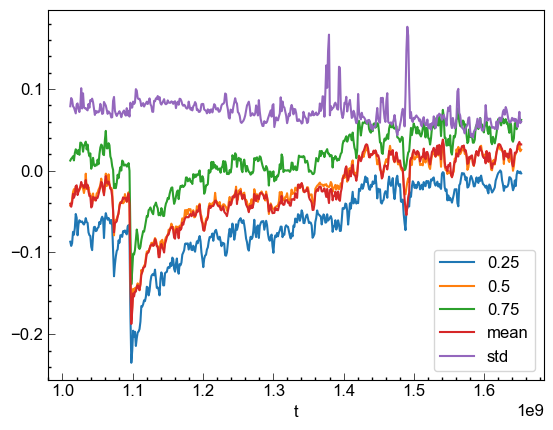

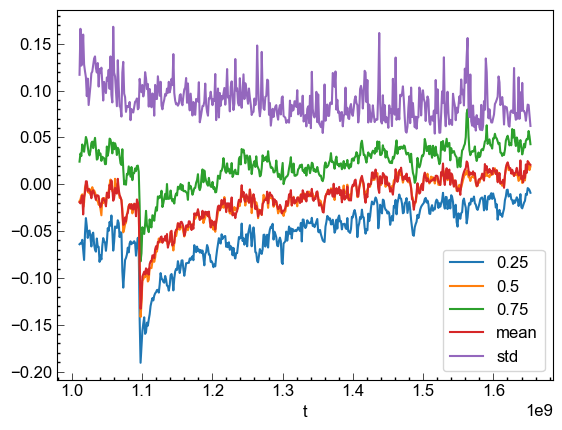

In [14]:
df_dvvfreq_stretching_stats.plot(y=df_dvvfreq_stretching_stats.columns[:-1])
df_dvvfreq_mwcs_stats.plot(y=df_dvvfreq_stretching_stats.columns[:-1])

In [15]:
# df_dvvfreq_stretching_stats.plot(y=df_dvvfreq_stretching_stats.columns[-1])
# df_dvvfreq_mwcs_stats.plot(y=df_dvvfreq_stretching_stats.columns[-1])

In [16]:
# fig, ax = plt.subplots(figsize=(10, 2))
# ax.bar(uniform_tvec, df_dvvfreq_stretching_stats["count"], width=15)
# ax.set_ylim(0, 630)
# ax.grid(True)

# Process LFE rates

The datasets are processed on July 2021. The figure below is the plot by Brent;

<img src="LFE_rate_peaks.png" alt="LFE rate" width="600"/>

The LFE rate is obtained by 2 days average, which causes 0.5 vaulues in rates, and the unit is [number/day]. We compute the cumsum of LFE_rate, and normalize it to see the change of slope associated with the cumsum value of LFEs. We also have the data of tremor rate, but it is limited up to 2017. 

In [17]:
df_LFE=pd.read_csv("../data/LFE_rates.txt", dtype=str, comment='#', header=None, sep=' ')
df_TRE=pd.read_csv("../data/tremor_rates.csv", dtype=str, comment='#', header=0, sep=',')
df_LFEpeak=pd.read_csv("../data/peak_times.txt", dtype=str, comment='#', header=None, sep=' ')

In [18]:
df_LFE["t"] = pd.to_datetime(df_LFE[0])
df_LFE["LFErate"] = df_LFE[2].astype(float)
df_LFE["LFErate_cumsum"] = np.cumsum(df_LFE["LFErate"])
df_LFEpeak["peakt"] = pd.to_datetime(df_LFEpeak[0])


In [19]:
df_LFE.head()

,0,1,2,t,LFErate,LFErate_cumsum
0,2001-05-01,21:04:40,0.0,2001-05-01,0.0,0.0
1,2001-05-02,21:04:40,1.0,2001-05-02,1.0,1.0
2,2001-05-03,21:04:40,1.0,2001-05-03,1.0,2.0
3,2001-05-04,21:04:40,0.0,2001-05-04,0.0,2.0
4,2001-05-05,21:04:40,0.0,2001-05-05,0.0,2.0


In [20]:
for index, row in df_LFEpeak.iterrows():
    df_temp=df_LFE[df_LFE['t']==row["peakt"]]
    df_LFEpeak.loc[index, "peakLFE"] = df_temp["LFErate"].values[0]
    df_LFEpeak.loc[index, "peakLFE_cumsum"] = df_temp["LFErate_cumsum"].values[0]

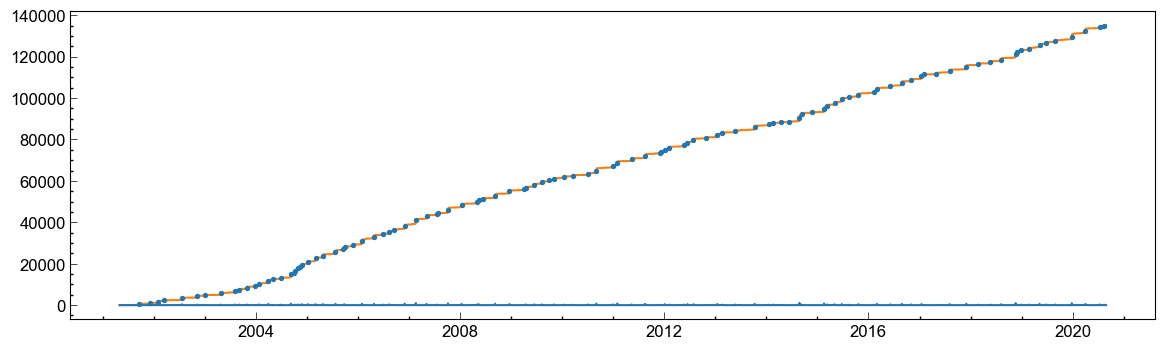

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(14,4))
ax.plot(df_LFE["t"], df_LFE["LFErate"])
ax.plot(df_LFE["t"], df_LFE["LFErate_cumsum"], zorder=1)
ax.scatter(df_LFEpeak["peakt"], df_LFEpeak["peakLFE_cumsum"], 8, zorder=2)

In [22]:
# compute the trend of pre-Parkfield EQ
df_LFE_preParkfield = df_LFE[df_LFE["t"] < datetime.datetime(2004, 9, 28)]
# plt.plot(df_LFE_preParkfield["t"], df_LFE_preParkfield["LFErate_cumsum"])
cumsum_date = np.arange(len(df_LFE_preParkfield["t"]))
slope_prePF, intersect_prePF = np.polyfit(cumsum_date, df_LFE_preParkfield["LFErate_cumsum"], 1)

prePF_trend = np.arange(len(df_LFE["t"])) * slope_prePF + intersect_prePF
prePF_trend

array([-1809.0812441 , -1797.33638443, -1785.59152476, ...,
       81062.64858753, 81074.3934472 , 81086.13830687])

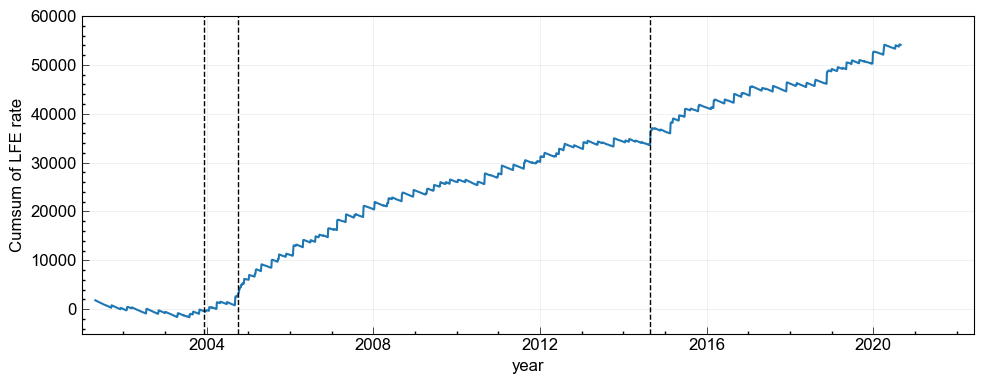

In [23]:
# check the count of cumulative LFE
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(df_LFE["t"], df_LFE["LFErate_cumsum"]-prePF_trend)
ax.set_xlabel("year")
ax.set_ylabel("Cumsum of LFE rate")
xfmt = dates.DateFormatter('%Y')
ax.set_xlim(datetime.datetime(2001,1,1), endtime)
ax.set_ylim(-5000, 60000)
ax.grid(True, axis="both", lw=0.5, c=[0.8, 0.8, 0.8], alpha=0.4, zorder=-20)

vlines = [datetime.datetime(2003, 12, 12), datetime.datetime(2004, 9, 28), datetime.datetime(2014, 8, 24)]

# plot the date of San Simeon and Parkfield eq.
for vline in vlines:
    ax.axvline(vline,
                color='k',
                linewidth=1.0,
                linestyle='--',
                zorder=2)
    
# fig.suptitle(f'dv/v {freqkey}Hz', x=0.53)
fig.tight_layout(rect=[0,0,1,1.])
plt.subplots_adjust(hspace=0.35)
fig.align_ylabels()

foname = (output_imgdir+f"/cumsum_LFE_2001-2020.png")
plt.savefig(foname, dpi=300, bbox_inches='tight')

In [24]:
df_LFE['LFErate'].rolling(window=10, win_type=None)

Rolling [window=10,center=False,axis=0,method=single]

In [25]:
# Update: we do not apply moving window by setting window=1.
df_LFE['LFErate_mean'] = df_LFE['LFErate'].rolling(window=1, win_type=None).mean()
maxsearchdays = 10
for index, row in df_LFEpeak.iterrows():
    st = row["peakt"]-datetime.timedelta(days=maxsearchdays)
    et = row["peakt"]+datetime.timedelta(days=maxsearchdays)
    df_temp=df_LFE[(df_LFE['t']>st) & (df_LFE['t']<et)]
    df_LFEpeak.loc[index, "LFErate_mean"] = np.max(df_temp["LFErate_mean"].values)

In [26]:
df_TRE["t"] = pd.to_datetime(df_TRE["time"])
df_TRE["t"] = pd.DatetimeIndex(df_TRE["t"]).normalize()# extract only date (ignore hours)
df_TRE["TRErate"] = df_TRE[' tremor_rate_[min/day]'].astype(float)
df_TRE["TRErate_cumsum"] = np.cumsum(df_TRE["TRErate"])
df_TRE

,time,tremor_rate_[min/day],t,TRErate,TRErate_cumsum
0,2001-08-10 01:39:10,0.0,2001-08-10,0.000000,0.000000
1,2001-08-11 01:39:10,0.0,2001-08-11,0.000000,0.000000
2,2001-08-12 01:39:10,0.0,2001-08-12,0.000000,0.000000
3,2001-08-13 01:39:10,0.0,2001-08-13,0.000000,0.000000
4,2001-08-14 01:39:10,0.0,2001-08-14,0.000000,0.000000
...,...,...,...,...,...
5762,2017-05-20 01:39:10,2.145834,2017-05-20,2.145834,16349.133950
5763,2017-05-21 01:39:10,2.145834,2017-05-21,2.145834,16351.279784
5764,2017-05-22 01:39:10,2.684167,2017-05-22,2.684167,16353.963951
5765,2017-05-23 01:39:10,3.386667,2017-05-23,3.386667,16357.350618


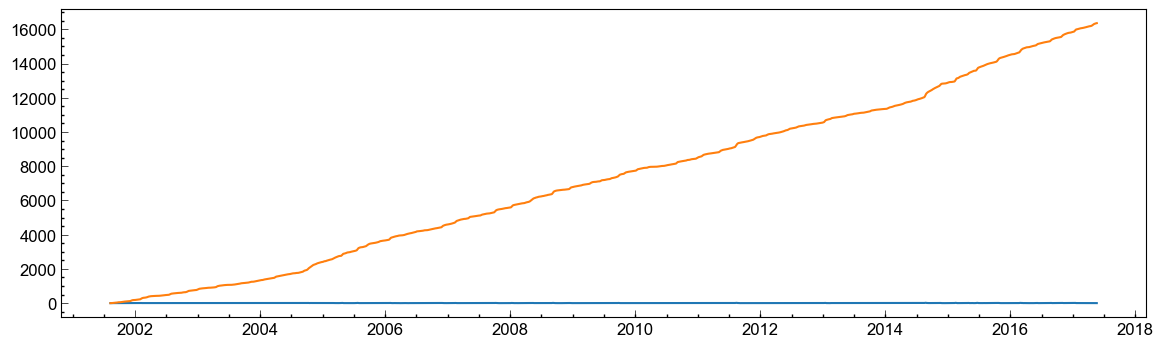

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(14,4))
ax.plot(df_TRE["t"], df_TRE["TRErate"])
ax.plot(df_TRE["t"], df_TRE["TRErate_cumsum"])

# Plot figure

In [28]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [29]:
cpalette_freq=np.array(sns.color_palette("colorblind"))[:]
cpalette_freq

array([[0.00392157, 0.45098039, 0.69803922],
       [0.87058824, 0.56078431, 0.01960784],
       [0.00784314, 0.61960784, 0.45098039],
       [0.83529412, 0.36862745, 0.        ],
       [0.8       , 0.47058824, 0.7372549 ],
       [0.79215686, 0.56862745, 0.38039216],
       [0.98431373, 0.68627451, 0.89411765],
       [0.58039216, 0.58039216, 0.58039216],
       [0.9254902 , 0.88235294, 0.2       ],
       [0.3372549 , 0.70588235, 0.91372549]])

In [30]:
tSS = datetime.datetime(2003, 12, 12) # date of San Simeon earthquake
vlines = [datetime.datetime(2003, 12, 12), datetime.datetime(2004, 9, 28), datetime.datetime(2014, 8, 24)] # re-include vline of South Napa eq 

refstarttime = datetime.datetime(2010, 1, 1)
refendtime = datetime.datetime(2022, 6, 1)

#---Extract the date with the freqkey---#
df_dvvfreq_stretching = df_stretching.loc[:, "dvv"].loc[:, df_stretching.loc[:, "dvv"].columns.get_level_values("freqband")==freqkey]
df_ccfreq_stretching = df_stretching.loc[:, "cc_dvv"].loc[:, df_stretching.loc[:, "cc_dvv"].columns.get_level_values("freqband")==freqkey]
df_errfreq_stretching = df_stretching.loc[:, "err"].loc[:, df_stretching.loc[:, "err"].columns.get_level_values("freqband")==freqkey]

df_dvvfreq_mwcs = df_mwcs.loc[:, "dvv"].loc[:, df_mwcs.loc[:, "dvv"].columns.get_level_values("freqband")==freqkey]
df_ccfreq_mwcs = df_mwcs.loc[:, "cc_dvv"].loc[:, df_mwcs.loc[:, "cc_dvv"].columns.get_level_values("freqband")==freqkey]
df_errfreq_mwcs = df_mwcs.loc[:, "err"].loc[:, df_mwcs.loc[:, "err"].columns.get_level_values("freqband")==freqkey]

#---Threshold out the dvv with cc and err for the cases with stretching and mwcs, respectively---#
df_dvvfreq_stretching.mask(df_ccfreq_stretching < cc_threshold, inplace=True)
df_dvvfreq_mwcs.mask(df_errfreq_mwcs > err_mwcs_eps, inplace=True)


#---Compute stats---#
df_dvvfreq_stretching_stats = df_dvvfreq_stretching.quantile([0.25, 0.5, 0.75], axis=1).T # 1st, 2nd, and 3rd quartiles
df_dvvfreq_stretching_stats.loc[:, "mean"] = df_dvvfreq_stretching.mean(skipna=True, axis=1).T #mean
df_dvvfreq_stretching_stats.loc[:, "std"] = df_dvvfreq_stretching.std(skipna=True, axis=1).T #std
df_dvvfreq_stretching_stats.loc[:, "count"] = df_dvvfreq_stretching.count(axis=1).T #number of data with each time window

df_dvvfreq_mwcs_stats = df_dvvfreq_mwcs.quantile([0.25, 0.5, 0.75], axis=1).T # 1st, 2nd, and 3rd quartiles
df_dvvfreq_mwcs_stats.loc[:, "mean"] = df_dvvfreq_mwcs.mean(skipna=True, axis=1).T #mean
df_dvvfreq_mwcs_stats.loc[:, "std"] = df_dvvfreq_mwcs.std(skipna=True, axis=1).T #std
df_dvvfreq_mwcs_stats.loc[:, "count"] = df_dvvfreq_mwcs.count(axis=1).T #number of data with each time window

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10.5, 6.1), sharex=False, gridspec_kw={'height_ratios': [1, 0.6]}) #(10.5, 9.1)
dvvdata_IsOffsetRemoval=True

freqkey = "0.9-1.2"

i = 1

#---plot dvv---#
if dvvdata_IsOffsetRemoval:
    offset_ind = np.where(np.array(uniform_tvec) < tSS)
    offset_data1 = np.nanmean(df_dvvfreq_stretching_stats[0.5].values[offset_ind]) # offset is evaluated with the mean of median dvv
    offset_data2 = np.nanmean(df_dvvfreq_mwcs_stats[0.5].values[offset_ind]) # offset is evaluated with the mean of median dvv
else:
    offset_data1 = 0
    offset_data2 = 0

# Plot stretching
axs[0].plot(uniform_tvec, df_dvvfreq_stretching_stats[0.5].values-offset_data1, "-", c=cpalette_freq[3], label="stretching", zorder=6, lw=1.4) # median
ybot1 =  df_dvvfreq_stretching_stats[0.25].values-offset_data1 #  1st quartile
ytop1 =  df_dvvfreq_stretching_stats[0.75].values-offset_data1 #  3rd quartile
axs[0].fill_between(uniform_tvec, ybot1, ytop1, color=cpalette_freq[3], alpha=0.1, label="", ec="k", lw=0.5, zorder=5)
axs[0].plot(uniform_tvec, ybot1, c=cpalette_freq[i], alpha=0.1, lw=0.7, ls="-")
axs[0].plot(uniform_tvec, ytop1, c=cpalette_freq[i], alpha=0.1, lw=0.7, ls="-")
axs[0].legend(loc=4, labelcolor="k", fontsize=11)

# mwcs
axs[0].plot(uniform_tvec, df_dvvfreq_mwcs_stats[0.5].values-offset_data2, "-", c=cpalette_freq[0], label="MWCS", zorder=6, lw=1.4) # median
ybot2 =  df_dvvfreq_mwcs_stats[0.25].values-offset_data2 #  1st quartile
ytop2 =  df_dvvfreq_mwcs_stats[0.75].values-offset_data2 #  3rd quartile
axs[0].fill_between(uniform_tvec, ybot2, ytop2, color=cpalette_freq[0], alpha=0.1, label="", ec="k", lw=0.5, zorder=5)
axs[0].plot(uniform_tvec, ybot2, c=cpalette_freq[i], alpha=0.1, lw=0.7, ls="-")
axs[0].plot(uniform_tvec, ytop2, c=cpalette_freq[i], alpha=0.1, lw=0.7, ls="-")
axs[0].legend(loc=4, labelcolor="k", fontsize=11)
axs[0].axhline(0, c="k", lw=0.75, ls="--", zorder=-5)

# plot LFE rate and nodmalized cumsum LFE
# plot number of LFE as second axis

axs[1].grid(True)
axs[1].bar(df_LFE["t"], df_LFE['LFErate_mean'], width=8, color='gray', alpha=0.4, zorder=1)
axs[1].scatter(df_LFEpeak["peakt"], df_LFEpeak["LFErate_mean"], 11,
                facecolor='white', edgecolor='k', zorder=2)
axs[1].set_ylabel("LFE rate [number/day]", color='k')
axs[1].tick_params(axis='y', colors='k')
axs[1].set_yticks([250, 500, 750, 1000])
axs[1].zorder=2

ax2 = axs[1].twinx()

detrended_cumusum_LFE = df_LFE["LFErate_cumsum"]-prePF_trend

# ax2.plot(df_LFE["t"], (df_LFE["LFErate_cumsum"])/np.max(df_LFE["LFErate_cumsum"]), "r", lw=2, zorder = 5)
ax2.plot(df_LFE["t"], detrended_cumusum_LFE/np.max(detrended_cumusum_LFE), "r", lw=2, zorder = 5)
ax2.set_ylabel("Normalized cumulative LFE", color='r')
ax2.tick_params(axis='y', colors='r')
ax2.zorder=3
ax2.patch.set_visible(False)

xfmt = dates.DateFormatter('%Y')
for i in range(2):
    
    axs[i].set_xlim(starttime, endtime)
    axs[i].grid(True, axis="both", lw=0.5, c=[0.8, 0.8, 0.8], alpha=0.4, zorder=-20)
#     plt.setp(axs[i].get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

    # plot the date of San Simeon and Parkfield eq.
    for vline in vlines:
        axs[i].axvline(vline,
                    color='k',
                    linewidth=1.0,
                    linestyle='--',
                    zorder=2)
    if i==0:
        axs[i].set_ylim(-0.25, 0.15)
        axs[i].set_yticks(np.linspace(-0.20, 0.15, 8))
        axs[i].set_ylabel("dv/v [%]")
        # period of unstable dv/v
        vlines_unstable = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 6, 1)]
        axs[i].fill_betweenx([-0.3, 0.3], vlines_unstable[0], vlines_unstable[1], fc="gray", alpha=0.7, ls="-", zorder=10)

        # annotate reference period
        refy = -0.3
        axs[i].annotate('', xy=(refstarttime, refy), xytext=(refendtime, refy), arrowprops=dict(arrowstyle='<->'), annotation_clip=False)
        axs[i].text(datetime.datetime(2016,6,1), -0.31, "reference stack period", ha="center", va='top')
        # axs[1].plot([refstarttime, refendtime], [-0.3, -0.3], clip_on=False,)


axs[0].set_title(f'dv/v with all components {freqkey}Hz')

plt.tight_layout()

plt.text(0.005, 0.95, "(a)", fontsize=14, fontweight="bold", transform=plt.gcf().transFigure)
plt.text(0.005, 0.38, "(b)", fontsize=14, fontweight="bold", transform=plt.gcf().transFigure)

# fig.suptitle(f'dv/v {freqkey}Hz', x=0.53)
fig.tight_layout(rect=[0,0,1,1.])
plt.subplots_adjust(hspace=0.35)
fig.align_ylabels()

foname = (output_imgdir+f"/dvv_comparison_ParkfieldLFErate_{freqkey}Hz.png")
plt.savefig(foname, dpi=300, bbox_inches='tight')